In [1]:
%run init_notebookspace.py

DATA_DIR is existant under: C:\Users\LukasGrahl\Documents\GIT\bayes_filter\data


In [2]:
import pandas as pd
from pandas_datareader import fred
import yfinance as yf

import matplotlib.pyplot as plt

In [3]:
from statsmodels.tsa.arima.model import ARIMA

In [4]:
start = '01/01/2020'
end = '12/31/2022'
end2 = '2022-12-31'
start2 = '2020-01-01'

In [5]:
gdp = fred.FredReader(symbols='GDP', start=start, end=end).read()

In [6]:
prices = yf.download('^GSPC', start2, end2)['Close']
pricesA = yf.download('AAPL', start2, end2)['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [7]:
rets = prices.pct_change().dropna().copy()
retsA = pricesA.pct_change().dropna().copy()

In [8]:
test_ind = 30

In [9]:
mod = ARIMA(endog=rets.iloc[:-test_ind], exog=retsA.iloc[:-test_ind], order=(5, 0, 5))

C:\Users\LukasGrahl\Documents\GIT\bayes_filter\env_bayes_filter\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LukasGrahl\Documents\GIT\bayes_filter\env_bayes_filter\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LukasGrahl\Documents\GIT\bayes_filter\env_bayes_filter\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [10]:
res = mod.fit()

C:\Users\LukasGrahl\Documents\GIT\bayes_filter\env_bayes_filter\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [11]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  725
Model:                 ARIMA(5, 0, 5)   Log Likelihood                2386.233
Date:                Tue, 21 Feb 2023   AIC                          -4746.466
Time:                        18:30:00   BIC                          -4686.846
Sample:                             0   HQIC                         -4723.457
                                - 725                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.000     -0.684      0.494      -0.001       0.000
Close          0.5356      0.009     60.795      0.000       0.518       0.553
ar.L1         -0.8757      0.465     -1.882      0.060      -1.788       0.037
ar.L2         -0.0839      0.340     -0.247      0.805      -0.751       0.583
ar.L3         -0.4662      0.216     -2.161      0.031      -0.889      -0.043
ar.L4         -0.8734      0.229     -3.812      0.000      -1.322      -0.424
ar.L5         -0.2863      0.287     -0.998      0.318      -0.849       0.276
ma.L1          0.8816      0.465      1.894      0.058      -0.030       1.794
ma.L2          0.1811      0.348      0.520      0.603      -0.501       0.863
ma.L3          0.5081      0.222      2.285      0.022       0.072       0.944
ma.L4          0.7906      0.251      3.145      0.002       0.298       1.283
ma.L5          0.3204      0.234      1.367      0.172      -0.139       0.780
sigma2      8.097e-05   2.84e-06     28.465      0.000    7.54e-05    8.65e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               399.88
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.40   Skew:                            -0.49
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

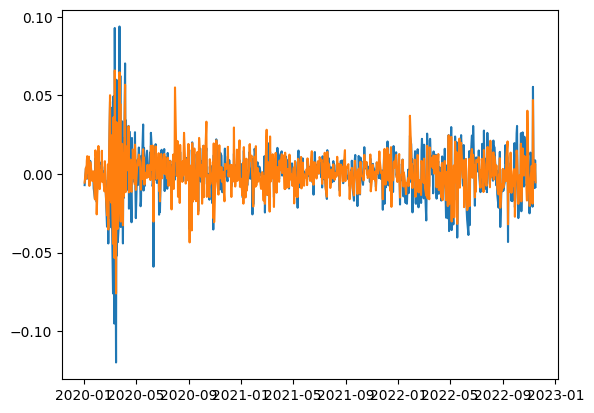

In [12]:
plt.plot(rets.iloc[:-test_ind])
plt.plot(res.predict())